In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [18]:
def get_scores_from_file(file_path): 
    scores = []
    with open(file_path, 'rb') as f:
        while True:
            try:
                scores.append(pickle.load(f))
            except EOFError:
                break
    scores
    scores = np.array(scores)
    rewards = np.array([score[0] for score in scores])
    rssi = np.array([score[1] for score in scores])
    energy = np.array([-score[2] for score in scores])
    return rewards, rssi, energy

In [19]:
def plot_tradeoff(rewards, rssi, energy):
    interval_size = 30
    reward_intervals = [(i, i + interval_size) for i in range(0, int(max(rewards)), interval_size)]

    avg_distances = []
    std_distances = []

    avg_energy = []
    std_energy = []

    for interval in reward_intervals:
        # Filter distances for the current reward interval
        interval_distances = [rssi[i] for i in range(len(rewards)) if interval[0] <= rewards[i] < interval[1]]
        interval_energy = [energy[i] for i in range(len(rewards)) if interval[0] <= rewards[i] < interval[1]]
        
        avg_distances.append(np.mean(interval_distances))
        std_distances.append(np.std(interval_distances))

        avg_energy.append(np.mean(interval_energy))
        std_energy.append(np.std(interval_energy))

    # Midpoints of reward intervals for plotting
    interval_midpoints = [(interval[0] + interval[1]) / 2 for interval in reward_intervals]

    # Create the plot
    fig, ax1 = plt.subplots(figsize=(7, 7))

    # Plot RSSI on the primary Y-axis
    ax1.scatter(interval_midpoints, avg_distances, marker='o', color='black', label='Average RSSI')
    ax1.fill_between(interval_midpoints, 
                    np.array(avg_distances) - np.array(std_distances), 
                    np.array(avg_distances) + np.array(std_distances), 
                    color='b', alpha=0.2, label='RSSI Standard Deviation')

    ax1.set_xlabel('Reward Intervals')
    ax1.set_ylabel('RSSI', color='b')
    ax1.set_ylim(-60, -10)
    ax1.tick_params(axis='y', labelcolor='b')
    ax1.set_title('AVG RSSI and Energy for Reward Intervals with STD')

    # Create a secondary Y-axis for energy
    ax2 = ax1.twinx()
    ax2.scatter(interval_midpoints, avg_energy, marker='x', color='black', label='Average Energy')
    ax2.fill_between(interval_midpoints, 
                    np.array(avg_energy) - np.array(std_energy), 
                    np.array(avg_energy) + np.array(std_energy), 
                    color='g', alpha=0.2, label='Energy Standard Deviation')

    ax2.set_ylabel('Energy', color='g')
    ax2.set_ylim(0, 40)
    ax2.tick_params(axis='y', labelcolor='g')

    # Add legends
    fig.legend(loc='upper right', bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes)

    # Show the plot
    plt.show()

For **homogeneous vehicles.**

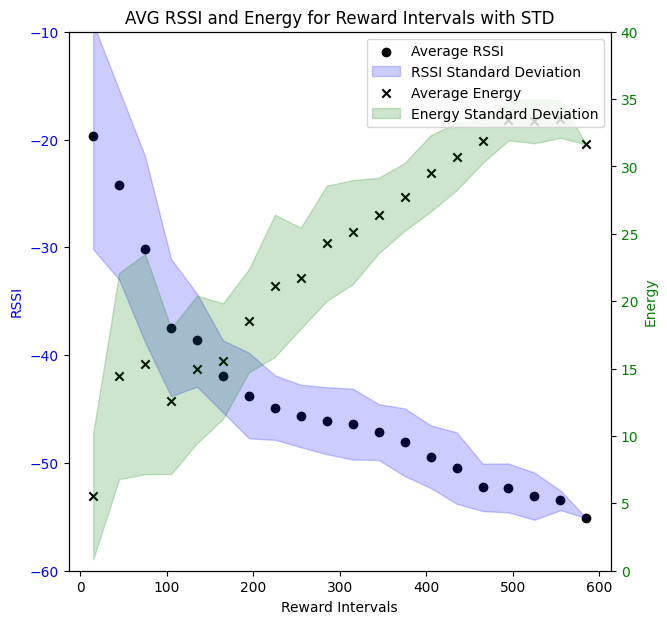

In [20]:
rewards, rssi, energy = get_scores_from_file('../out/front/3_agents/35.0_bgt/1_spd/scores.pkl')
plot_tradeoff(rewards, rssi, energy)

For vehicles with **different speeds.**

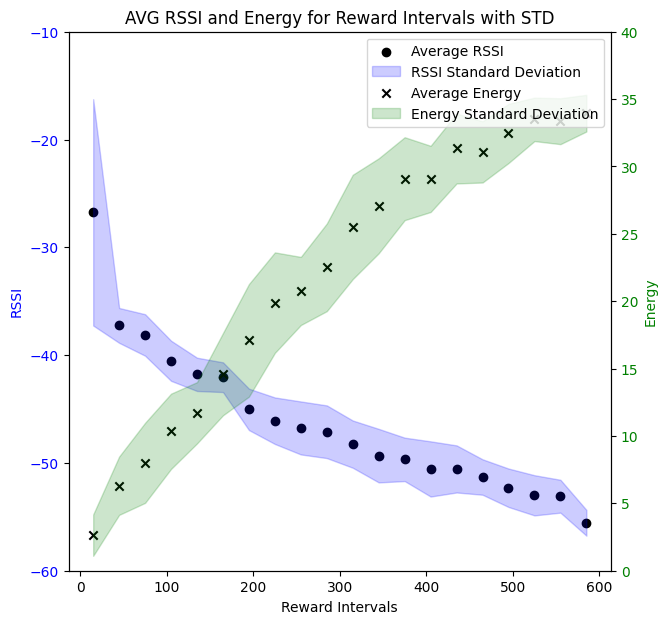

In [21]:
rewards, rssi, energy = get_scores_from_file('../out/front/3_agents/35.0_bgt/2.0_spd/scores.pkl')
plot_tradeoff(rewards, rssi, energy)

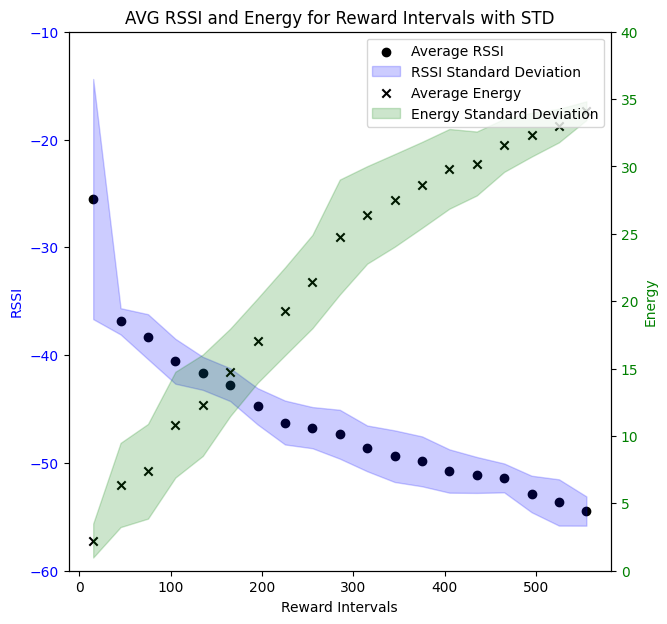

In [22]:
rewards, rssi, energy = get_scores_from_file('../out/front/3_agents/35.0_bgt/3.0_spd/scores.pkl')
plot_tradeoff(rewards, rssi, energy)